<a href="https://colab.research.google.com/github/nikkkkhil/helmet-mask-detection/blob/master/yolo_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os

In [0]:
os.chdir('/content/drive/My Drive/yolo_detection')

In [0]:
!ls -l

total 3752593
-rw-------  1 root root 1913589814 Feb  2  2017 cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
-rw-------  1 root root 1913589814 Feb  2  2017 cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb.1
drwx------ 17 root root       4096 May 22 05:36 darknet
-rw-------  1 root root   15466031 May 22 14:04 data.zip
drwx------  2 root root       4096 May 22 05:34 Yolo-Training-GoogleColab


In [0]:
!apt-get update
!apt-get upgrade

Hit:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:2 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic/main Sources [1,818

In [0]:
!apt-get install build-essential
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.7).
libavcodec-dev is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
libavcodec-dev set to manually installed.
libavformat-dev is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
libavformat-dev set to manually installed.
libswscale-dev is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
libswscale-dev set to manually installed.
The following additional packages will be installed:
  autoconf automake autopoint autotools-dev debhelper dh-autoreconf
  dh-strip-nondeterminism file gette

In [0]:
!apt-get install libavcodec-dev libavformat-dev libswscale-d

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libswscale-d


In [0]:
!apt-get -y install cmake
!which cmake

!cmake --version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
/usr/local/bin/cmake
cmake version 3.12.0

CMake suite maintained and supported by Kitware (kitware.com/cmake).


In [0]:
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [0]:
!apt-get install vim

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgpm2 vim-common vim-runtime xxd
Suggested packages:
  gpm ctags vim-doc vim-scripts
The following NEW packages will be installed:
  libgpm2 vim vim-common vim-runtime xxd
0 upgraded, 5 newly installed, 0 to remove and 7 not upgraded.
Need to get 6,724 kB of archives.
After this operation, 32.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 xxd amd64 2:8.0.1453-1ubuntu1.3 [49.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim-common all 2:8.0.1453-1ubuntu1.3 [70.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgpm2 amd64 1.20.7-5 [15.1 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim-runtime all 2:8.0.1453-1ubuntu1.3 [5,436 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim amd64 2:8.0.1453-

In [0]:
ls

cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb.1
darknet/
data.zip
Yolo-Training-GoogleColab/


In [0]:
cd darknet/

/content/drive/My Drive/yolo_detection/darknet


In [0]:
ls

3rdparty/                  DarknetConfig.cmake.in  net_cam_v3.sh
backup/                    darknet.py              obj/
build/                     darknet_video.py        predictions.jpg
build.ps1                  data/                   README.md
build.sh                   data_for_colab/         results/
cfg/                       image_yolov2.sh         scripts/
chart.png                  image_yolov3.sh         src/
chart_yolov3-tiny-obj.png  include/                video_v2.sh
cmake/                     json_mjpeg_streams.sh   video_yolov3.sh
CMakeLists.txt             LICENSE                 yolov3.weights
darknet                    Makefile


In [0]:
#No here we're modifying the makefile to set OPENCV and GPU to 1
!ls
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile

17.jpg			   darknet		   Makefile
3rdparty		   DarknetConfig.cmake.in  net_cam_v3.sh
backup			   darknet.py		   obj
build			   darknet_video.py	   predictions.jpg
build.ps1		   data			   README.md
build.sh		   data_for_colab	   results
cfg			   image_yolov2.sh	   scripts
chart.png		   image_yolov3.sh	   src
chart_yolov3-tiny-obj.png  include		   video_v2.sh
cmake			   json_mjpeg_streams.sh   video_yolov3.sh
CMakeLists.txt		   LICENSE		   yolov3.weights


In [0]:

!ls
%cd ../
!ls

17.jpg			   darknet		   Makefile
3rdparty		   DarknetConfig.cmake.in  net_cam_v3.sh
backup			   darknet.py		   obj
build			   darknet_video.py	   predictions.jpg
build.ps1		   data			   README.md
build.sh		   data_for_colab	   results
cfg			   image_yolov2.sh	   scripts
chart.png		   image_yolov3.sh	   src
chart_yolov3-tiny-obj.png  include		   video_v2.sh
cmake			   json_mjpeg_streams.sh   video_yolov3.sh
CMakeLists.txt		   LICENSE		   yolov3.weights
/content/drive/My Drive/yolo_detection
cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb.1
darknet
data.zip
Yolo-Training-GoogleColab


In [0]:
!apt install g++-5
!apt install gcc-5

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cpp-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 7 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base amd64 5.5.0-12ubuntu1 [17.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libisl15 amd64 0.18-4 [548 kB]
Get:3 http

In [0]:
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 10
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 10
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 20
!update-alternatives --install /usr/bin/cc cc /usr/bin/gcc 30
!update-alternatives --set cc /usr/bin/gcc
!update-alternatives --install /usr/bin/c++ c++ /usr/bin/g++ 30
!update-alternatives --set c++ /usr/bin/g++

update-alternatives: using /usr/bin/gcc-5 to provide /usr/bin/gcc (gcc) in auto mode
update-alternatives: using /usr/bin/g++-5 to provide /usr/bin/g++ (g++) in auto mode


In [0]:
#Now, here's a bunch of code that takes the longest to execute here but
#It's about installing CUDA and using the beautiful Tesla K80 GPU, so that
#Will worth it

!apt update -qq;
# !wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt-get update -qq

#Here were are installing compilers and creating some links
!apt-get install cuda -y -qq #gcc-5 g++-5 
#!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
#!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++
!apt update
!apt upgrade
!apt install cuda-8.0 -y

7 packages can be upgraded. Run 'apt list --upgradable' to see them.
Selecting previously unselected package cuda-repo-ubuntu1604-8-0-local-ga2.
(Reading database ... 147417 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb ...
Unpacking cuda-repo-ubuntu1604-8-0-local-ga2 (8.0.61-1) ...
Setting up cuda-repo-ubuntu1604-8-0-local-ga2 (8.0.61-1) ...
Note: Check first if apt-key functionality is needed at all - it probably isn't!
OK
Extracting templates from packages: 100%
Selecting previously unselected package cuda-license-10-2.
(Reading database ... 147511 files and directories currently installed.)
Preparing to unpack .../00-cuda-license-10-2_10.2.89-1_amd64.deb ...
Unpacking cuda-license-10-2 (10.2.89-1) ...
Selecting previously unselected package cuda-misc-headers-10-2.
Preparing to unpack .../01-cuda-misc-headers-10-2_10.2.89-1_amd64.deb ...
Unpacking cuda-misc-headers-10-2 (10.2.89-1) ...
Selecting previously unsel

In [0]:
#Now let's see whether the GPU is here and CUDA was successfully installed!
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

print("'sup!'")

!/usr/local/cuda/bin/nvcc --version

/device:GPU:0
'sup!'
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


In [0]:
ls

cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb.1
darknet/
data.zip
Yolo-Training-GoogleColab/


In [0]:
 %cd darknet
!make

/content/drive/My Drive/yolo_detection/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-Wunused-variable]
     int it_tb_r

In [0]:
!ls
#Now, let's see if everything works by running it on a test image
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

3rdparty		   DarknetConfig.cmake.in  net_cam_v3.sh
backup			   darknet.py		   obj
build			   darknet_video.py	   predictions.jpg
build.ps1		   data			   README.md
build.sh		   data_for_colab	   results
cfg			   image_yolov2.sh	   scripts
chart.png		   image_yolov3.sh	   src
chart_yolov3-tiny-obj.png  include		   video_v2.sh
cmake			   json_mjpeg_streams.sh   video_yolov3.sh
CMakeLists.txt		   LICENSE		   yolov3.weights
darknet			   Makefile
 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208

In [0]:
#Let's define some functions that will let us show images, and upload and 
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

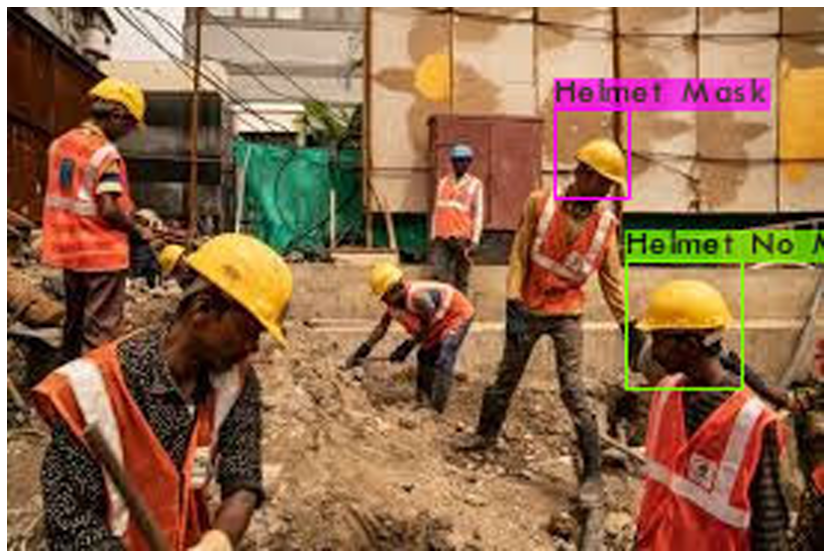

In [0]:
imShow('predictions.jpg')

In [0]:
ls

3rdparty/                  DarknetConfig.cmake.in  net_cam_v3.sh
backup/                    darknet.py              obj/
build/                     darknet_video.py        predictions.jpg
build.ps1                  data/                   README.md
build.sh                   data_for_colab/         results/
cfg/                       image_yolov2.sh         scripts/
chart.png                  image_yolov3.sh         src/
chart_yolov3-tiny-obj.png  include/                video_v2.sh
cmake/                     json_mjpeg_streams.sh   video_yolov3.sh
CMakeLists.txt             LICENSE                 yolov3.weights
darknet                    Makefile


In [0]:
# !./darknet detector train data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg data_for_colab/yolov3-tiny.conv.15 -dont_show

 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
yolov3-tiny-obj
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 32, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->

In [0]:
!./darknet detector train data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: 0.656810, GIOU: 0.633036), Class: 0.998585, Obj: 0.872234, No Obj: 0.005911, .5R: 0.825581, .75R: 0.430233, count: 86, class_loss = 0.344279, iou_loss = 0.348157, total_loss = 0.692436 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000000, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: 0.652769, GIOU: 0.625923), Class: 0.996081, Obj: 0.882571, No Obj: 0.005864, .5R: 0.770115, .75R: 0.471264, count: 87, class_loss = 0.393204, iou_loss = 0.484375, total_loss = 0.877579 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000000, .5R: 0.000000, .75R: 0.000000, count: 1

In [0]:

from google.colab import files
uploaded = files.upload() 
for name, data in uploaded.items():
  print(name)
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

Saving Kochi_Metro_resumes.jpg to Kochi_Metro_resumes.jpg
Kochi_Metro_resumes.jpg
saved file Kochi_Metro_resumes.jpg


In [0]:
!ls

In [0]:
!./darknet detector test data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_last.weights ./Kochi_Metro_resumes.jpg -i 0 -thresh 0.5

 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 2, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 

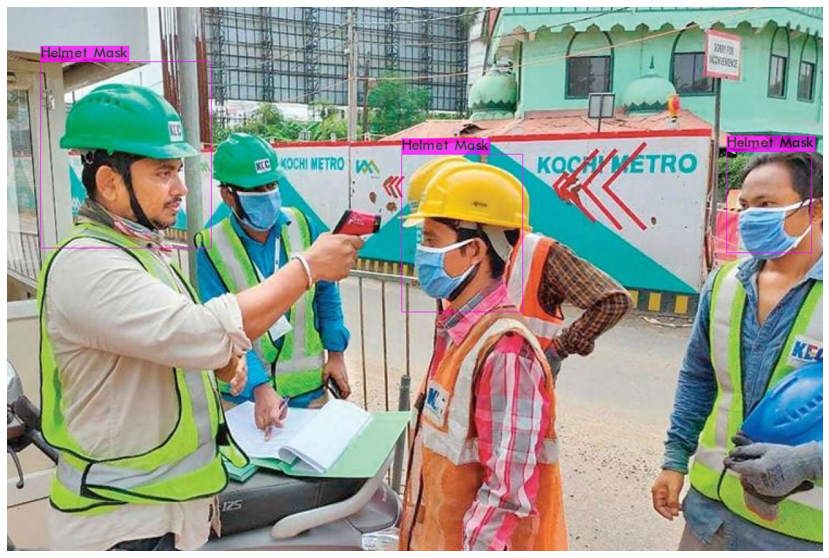

In [0]:
imShow('predictions.jpg')


In [0]:
ls

17.jpg     chart.png                  data_for_colab/         out.mp4
191.jpg    chart_yolov3-tiny-obj.png  image_yolov2.sh*        predictions.jpg
26.jpg     cmake/                     image_yolov3.sh*        README.md
3rdparty/  CMakeLists.txt             include/                results/
backup/    darknet*                   json_mjpeg_streams.sh*  scripts/
build/     DarknetConfig.cmake.in     LICENSE                 src/
build.ps1  darknet.py                 Makefile                video_v2.sh*
build.sh*  darknet_video.py           net_cam_v3.sh*          video_yolov3.sh*
cfg/       data/                      obj/                    yolov3.weights


In [0]:
!unzip ../video.zip

Archive:  ../video.zip
  inflating: out.mp4                 


In [0]:
!./darknet detector demo data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_14000.weights  -dont_show out.mp4 -i 0 -out_filename veout.avi

Streaming output truncated to the last 5000 lines.
Helmet Mask: 47% 

FPS:20.0 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

Helmet No Mask!!: 25% 
Helmet Mask: 100% 
Helmet Mask: 100% 
Helmet Mask: 98% 
Helmet Mask: 98% 
Helmet Mask: 75% 
Helmet Mask: 27% 

FPS:20.1 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

Helmet Mask: 100% 
Helmet Mask: 100% 

FPS:21.6 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

Helmet No Mask!!: 100% 

FPS:22.9 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

Helmet No Mask!!: 68% 

FPS:23.8 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

Helmet No Mask!!: 100% 

FPS:24.3 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

Helmet No Mask!!: 100% 

FPS:24.3 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

Helmet No Mask!!: 93% 
Helmet No Mask!!: 91% 
Helmet Mask: 99% 

FPS:24.3 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No Helmet!! Mask: 100% 
No Helmet!! Mask: 99% 
No Helmet!! Mask: 98% 

FPS:24.1 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No Helmet!! Mask: 100% 

FPS:23.5 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No Helm

In [0]:
ls

17.jpg     chart_yolov3-tiny-obj.png  image_yolov3.sh*        results/
191.jpg    cmake/                     include/                scripts/
26.jpg     CMakeLists.txt             json_mjpeg_streams.sh*  src/
3rdparty/  darknet*                   LICENSE                 veout.avi
backup/    DarknetConfig.cmake.in     Makefile                video_v2.sh*
build/     darknet.py                 net_cam_v3.sh*          video_yolov3.sh*
build.ps1  darknet_video.py           obj/                    yolov3.weights
build.sh*  data/                      out.mp4
cfg/       data_for_colab/            predictions.jpg
chart.png  image_yolov2.sh*           README.md


In [0]:
download('veout.avi')


----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 60298, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
mv *.jpg ./images/